In [24]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
from diffusion_models_enso.data_processing import get_statistics
from diffusion_models_enso.utils.utils import plot_ENZO

In [25]:
# moms = [12,1,2]
# months = ["Dec","Jan","Feb"]

# for ii,momo in enumerate(moms):
#     all_mea_trend, all_lens_mea_trend, all_mea_file_paths, all_lens_file_paths, all_lens_closest_indexes = get_data(momo,flag=False)
#     np.save(months[ii]+"_Global_Diff_Trend",all_mea_trend)
#     np.save(months[ii]+"_Global_Lens_Trend",all_lens_mea_trend)

#     all_mea_trend, all_lens_mea_trend, all_mea_file_paths, all_lens_file_paths, all_lens_closest_indexes = get_data(momo,flag=True)
#     np.save(months[ii]+"_Nino_190240_Diff_Trend",all_mea_trend)
#     np.save(months[ii]+"_Nino_190240_Lens_Trend",all_lens_mea_trend)
#     np.save(months[ii]+"_paths_Diff",all_mea_file_paths)
#     np.save(months[ii]+"_paths_Lens",all_lens_file_paths)
#     np.save(months[ii]+"_ClosestIndex_Lens",all_lens_closest_indexes)

In [26]:
### Load the Data
folder = '../data/ENSO_data'
months = ["JAN"]

# # Nino_Lens_Paths = [folder+'/'+x+'_Nino_Lens_Trend.npy' for x in months]
# # Nino_Diff_Paths = [folder+'/'+x+'_Nino_Diff_Trend.npy' for x in months]

# # Nino_Lens_Paths_NewZone = [folder+'/'+x+'_Nino_190240_Lens_Trend.npy' for x in months]
# # Nino_Diff_Paths_NewZone = [folder+'/'+x+'_Nino_190240_Diff_Trend.npy' for x in months]
# Nino_Lens_Paths_NewZone = [folder+'/'+x+'_Nino_NEW_Lens_Trend.npy' for x in months]
# Nino_Diff_Paths_NewZone = [folder+'/'+x+'_Nino_NEW_Diff_Trend.npy' for x in months]

# # Global_Lens_Paths = [folder+'/'+x+'_Global_Lens_Trend.npy' for x in months]
# # Global_Diff_Paths = [folder+'/'+x+'_Global_Diff_Trend.npy' for x in months]

Nino_Diff_Paths = [folder+'/'+month+'_DIFF_NINO_trend.npy' for month in months]

In [27]:
Nino_means_Diff , Nino_var_Diff, Nino_all_Diff = get_statistics(Nino_Diff_Paths)
# Nino_means_Lens , Nino_var_Lens, Nino_all_Lens = get_statistics(Nino_Lens_Paths)

# Nino_NewZone_means_Diff, Nino_NewZone_var_Diff, Nino_NewZone_all_Diff = get_statistics(Nino_Diff_Paths_NewZone)
# Nino_NewZone_means_Lens, Nino_NewZone_var_Lens, Nino_NewZone_all_Lens = get_statistics(Nino_Lens_Paths_NewZone)

# Global_means_Diff , Global_var_Diff, Global_all_Diff = get_statistics(Global_Diff_Paths)
# Global_means_Lens , Global_var_Lens, Global_all_Lens = get_statistics(Global_Lens_Paths)

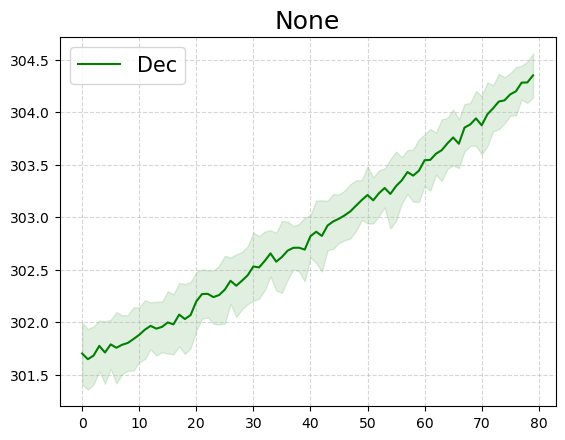

In [33]:
#fig, ax = plt.subplots(ncols=2, figsize=(20,10))
fig, ax = plt.subplots()
plot_ENZO(Nino_means_Diff,Nino_var_Diff,ax,title="None")
# plot_ENZO(Nino_NewZone_means_Diff,Nino_NewZone_var_Diff,ax[0],'Nino 3.4 Diffusion')
#plot_ENZO(Nino_NewZone_means_Lens,Nino_NewZone_var_Lens,ax[1],'Nino 3.4 Lens')

In [ ]:
members_NewZone = [ [Nino_NewZone_all_Lens[0][key][j] for key in range(0,len(Nino_NewZone_all_Lens[0]))] for j in range(0,3)]
# members = [ [Nino_all_Lens[0][key][j] for key in range(0,len(Nino_all_Lens[0]))] for j in range(0,3)]

fig , ax = plt.subplots()

for i in range(0,len(members_NewZone)):
    ax.plot(members_NewZone[i],alpha=0.6)

    
#ax.plot(Nino_NewZone_means_Lens[0],color='k')

ax.set_title('Lens: a few members, New zone')
ax.set_xlim(0,30)

In [ ]:
# fig, ax = plt.subplots(ncols=2, figsize=(20,10))
# plot_ENZO(Global_means_Diff,Global_var_Diff,ax[0],'Global Diffusion')
# plot_ENZO(Global_means_Lens,Global_var_Lens,ax[1],'Global Lens')

In [ ]:
# ANOMALIES_Lens, before_removing_ensemble_Lens = evaluate_anomalies(months,Nino_NewZone_all_Lens,Global_means_Lens)
# ANOMALIES_Diff, before_removing_ensemble_Diff = evaluate_anomalies(months,Nino_NewZone_all_Diff,Global_means_Diff)

In [ ]:
ANOMALIES_Lens = Nino_NewZone_all_Lens
ANOMALIES_Diff = Nino_NewZone_all_Diff


fig, ax = plt.subplots(ncols=2, figsize = (20,10))
colors = ['r','b','g']
for ii, month in enumerate(months): 
    anomalies = ANOMALIES_Lens[ii]
    for key in anomalies.keys():
        ax[0].plot([2015+key]*len(anomalies[0]),anomalies[key],'*', alpha =0.7,color=colors[ii])
        if(key==5):
            ax[0].plot([2015+key]*len(anomalies[0]),anomalies[key],'*', alpha =0.7,color=colors[ii],label=month)

    anomalies = ANOMALIES_Diff[ii]
    for key in anomalies.keys():
        ax[1].plot([2015+key]*len(anomalies[0]),anomalies[key],'*', alpha =0.7,color=colors[ii])
        if(key==5):
            ax[1].plot([2015+key]*len(anomalies[0]),anomalies[key],'*', alpha =0.7,color=colors[ii],label=month)
ax[0].legend()
ax[1].legend()

In [ ]:
##### FIX THE MONTH : DECEMBER #####
month = 12
anomalies = ANOMALIES_Lens[0]
paths = np.load("./Dec_paths_Lens.npy",allow_pickle=True).item()
closest_inds = np.load("./Dec_ClosestIndex_Lens.npy",allow_pickle=True).item()
Ensemble_data = np.load("./Dec_EnsembleMeans_Lens.npy",allow_pickle=True).item()
Ensemble_data_PRECT = np.load("./Dec_EnsembleMeans_Precipitation_Lens.npy",allow_pickle=True).item()

all_anomalies = np.concatenate(
    [anomalies[key]  for key in anomalies.keys()]
)

In [ ]:
fig, ax = plt.subplots()

for key in anomalies.keys():
    anomalies_adjusted = anomalies[key] 
    ax.plot(
        [2015 + key] * len(anomalies_adjusted), anomalies_adjusted, "*", alpha=0.1, color="b"
    ) 


year = 5
index_max = np.argmax(  abs( anomalies[year] ) )
ax.plot([2015+year],anomalies[year][index_max],'*',color='r')

In [ ]:
# Plot an ENSO

picked_year = year
picked_index = index_max 
DS = get_snapshot_Lens(paths,closest_inds,month,picked_year,picked_index)
lat_global = DS['lat'].values
lon_global = DS['lon'].values

Ensemble = Ensemble_data[year]
# Create an xarray DataArray from the stacked data
ds = xr.DataArray(Ensemble, dims=['lat', 'lon'], coords={'lat': lat_global, 'lon': lon_global})

diff = DS.TREFHT - ds
diff.sel(lat=slice(-35,35)).plot() #lon=slice(120,290)

In [ ]:
# Plot setup
fig, ax = plt.subplots()
# Plot all ensemble members and highlight anomalies above the upper tercile

for key in anomalies.keys():
    anomalies_adjusted = anomalies[key] 
    ax.plot(
        [2015 + key] * len(anomalies_adjusted), anomalies_adjusted, "*", alpha=0.1, color="b"
    )  # Normal members


    
# # Highlight year and index with max anomaly in red
# ax.plot(
#     [2015 + year],
#     anomalies[year][index_max] ,
#     "*",
#     alpha=0.2,
#     color="r",
# )

# Plot the tercile line
upper_tercile = np.percentile(all_anomalies, 80)  # Upper tercile threshold
lower_tercile = np.percentile(all_anomalies, 20)  # Lower tercile threshold
ax.axhline(y=upper_tercile, color="r", linestyle="--", label="Upper Tercile")
ax.axhline(y=lower_tercile, color="b", linestyle="--", label="Lower Tercile")


anomalies_above = dict()

for key in anomalies.keys():
    anomalies_adjusted = anomalies[key] 

    # Highlight members above the upper tercile
    anomalies_above_tercile = anomalies_adjusted > upper_tercile  # Boolean mask
    anomalies_above[key]=anomalies_above_tercile
    x_coords = np.full(np.sum(anomalies_above_tercile), 2015 + key)  # Match x size to filtered y
    
    ax.plot(
        x_coords, 
        anomalies_adjusted[anomalies_above_tercile],
        "*",
        alpha=0.4,
        color="r",
    )

# Title and legend
ax.set_title("Anomalies Index 3.4 wrt Global Temperature")
ax.legend()
plt.show()

In [ ]:
########### LET'S TAKE ALL THE ENSO TOGETHER #############

In [ ]:
a = 0
for key , element in anomalies_above.items():
    a = a + np.sum(element)
a

In [ ]:
# paths = np.load("./Dec_paths_Lens.npy",allow_pickle=True).item()
# closest_inds = np.load("./Dec_ClosestIndex_Lens.npy",allow_pickle=True).item()
# Ensemble_data = np.load("./Dec_EnsembleMeans_Lens.npy",allow_pickle=True).item()
# Ensemble_data_PRECT

data_list = []

for key , element in anomalies_above.items():
    Ensemble = Ensemble_data[key]
    # Create an xarray DataArray from the stacked data
    ds = xr.DataArray(Ensemble, dims=['lat', 'lon'], coords={'lat': lat_global, 'lon': lon_global})
    ds = ds.sel(lat=slice(-20,20),lon=slice(120,290))
    lat_regional = ds['lat'].values
    lon_regional = ds['lon'].values
    
    for index_to_get in range(0,len(element)):
        if(element[index_to_get] == True ):
            DS = get_snapshot_Lens(paths,closest_inds,month,key,index_to_get)
            DS = DS.sel(lat=slice(-20,20),lon=slice(120,290))
            # lat1 = DS['lat'].values
            # lon1 = DS['lon'].values
            diff = DS.TREFHT - ds
            data_list.append( diff.values  )
    print(key)       

In [ ]:
# DS = get_snapshot_Lens(paths,closest_inds,month,picked_year,picked_index)
# DS = DS.sel(lat=slice(-20,20),lon=slice(120,290))
# lat = DS['lat'].values
# lon = DS['lon'].values



In [ ]:
# Step 1: Preprocess - Flatten the 2D data arrays into 1D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
def flatten_data(data_list):
    """
    Flattens each 2D SST anomaly map into a 1D array and stacks them into a matrix.
    """
    data_matrix = []
    for data in data_list:
        data_matrix.append(data.flatten())
    return np.array(data_matrix)

# Step 2: Load the data and flatten it
# Replace this list with your actual xarray DataArrays
# Example placeholder:
# sst_anomaly_maps = [ds1, ds2, ds3, ...]
data_matrix = flatten_data(data_list)
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale to range [0, 1]
data_matrix_normalized = scaler.fit_transform(data_matrix)
# Step 3: K-means Clustering
num_clusters = 3  # Choose the number of ENSO flavors to classify

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_normalised = KMeans(n_clusters=num_clusters, random_state=42)

In [ ]:
clusters = kmeans.fit_predict(data_matrix)  # Fit and get cluster labels
clusters_normalised = kmeans_normalised.fit_predict(data_matrix_normalized)
cluster_centers_rescaled = scaler.inverse_transform(kmeans_normalised.cluster_centers_)

In [ ]:
clustered_maps = kmeans.cluster_centers_.reshape(num_clusters, len(lat_regional), len(lon_regional))
clustered_maps_normalised = cluster_centers_rescaled.reshape(num_clusters, len(lat_regional), len(lon_regional))

In [ ]:
# Step 5: Plot the clustered ENSO flavors
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5))
vmin, vmax = np.min(clustered_maps), np.max(clustered_maps)

for i, ax in enumerate(axes):
    im = ax.pcolormesh(lon_regional, lat_regional, clustered_maps[i], cmap="RdBu_r", vmin=vmin, vmax=vmax)
    ax.set_title(f"Cluster {i+1}")
    #plt.colorbar(im, ax=ax, orientation="vertical",)
fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.04, label="SST Anomalies (K)")

#plt.tight_layout()
plt.show()
#fig.savefig('clustering_not_normalised_20.png')

In [ ]:
# # Step 5: Plot the clustered ENSO flavors
# fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5))
# vmin, vmax = np.min(clustered_maps), np.max(clustered_maps)

# for i, ax in enumerate(axes):
#     im = ax.pcolormesh(lon, lat, clustered_maps_normalised[i], cmap="RdBu_r", vmin=vmin, vmax=vmax)
#     ax.set_title(f"Cluster {i+1}")
#     #plt.colorbar(im, ax=ax, orientation="vertical",)
# fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.04, label="SST Anomalies (K)")

# #plt.tight_layout()
# plt.show()
# #plt.savefig('clustering_not_normalised.png')

In [ ]:
# Step 5: Plot the clustered ENSO flavors
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5))
vmin, vmax = np.min(clustered_maps), np.max(clustered_maps)

for i, ax in enumerate(axes):
    im = ax.pcolormesh(lon_regional, lat_regional, clustered_maps_normalised[i], cmap="RdBu_r")
    ax.set_title(f"Cluster {i+1}")
    #plt.colorbar(im, ax=ax, orientation="vertical",)
fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.04, label="SST Anomalies (K)")

#plt.tight_layout()
plt.show()
#fig.savefig('clustering_normalised_20.png')

In [ ]:
######## COMPOSITE ########

In [ ]:
Enso_data = [] 
DS = get_snapshot_Lens(paths,closest_inds,month,picked_year,picked_index)
lat = DS['lat'].values
lon = DS['lon'].values
for key , element in anomalies_above.items():
    Ensemble = Ensemble_data[key]
    Ensemble_PRECT = Ensemble_data_PRECT[key]
    # Create an xarray DataArray from the stacked data
    ds = xr.DataArray(Ensemble, dims=['lat', 'lon'], coords={'lat': lat_global, 'lon': lon_global})
    ds_PRECT = xr.DataArray(Ensemble_PRECT, dims=['lat', 'lon'], coords={'lat': lat_global, 'lon': lon_global})
    #ds = ds.sel(lat=slice(-20,20),lon=slice(120,290))
    for index_to_get in range(0,len(element)):
        if(element[index_to_get] == True ):
            DS = get_snapshot_Lens(paths,closest_inds,month,key,index_to_get)
            #DS = DS.sel(lat=slice(-20,20),lon=slice(120,290))
            # lat1 = DS['lat'].values
            # lon1 = DS['lon'].values
            
            Enso_data.append( DS.PRECT - ds_PRECT  )
    print(key)   

In [ ]:
different_clusters = np.unique( clusters_normalised )
SUMS = []
for value in different_clusters:
    cluster_index = np.where( clusters_normalised == value )[0]
    Sum = Enso_data[cluster_index[0]]#.PRECT
    for x in cluster_index[1:]:
        Sum = Sum + Enso_data[x] / len(cluster_index) #.PRECT
    SUMS.append(Sum)

In [ ]:
fig, ax = plt.subplots(ncols=3,figsize=(20,10))

for i in range(0,len(SUMS)):
    SUMS[i].plot(ax=ax[i])

In [ ]:
paths = np.load("data/Jan_paths_Diff.npy",allow_pickle=True).item()
#closest_inds = np.load("data/Jan_ClosestIndex_Lens.npy",allow_pickle=True).item()

month = 12
picked_year = year
picked_index = index_max 
DS = get_snapshot_Diff(paths,month,picked_year,picked_index)

DS 
#slope = compute_regression_slopes(DS.sel(samples=slice(0,500)), vardo='TREFHT', region_lat=(-5, 5), region_lon=(190, 240))

In [ ]:
#mean_anomaly = [np.mean(x) for x in anomalies.values()]   
# year = 38
# index_max = np.argmax(Dec[year])

# fig, ax = plt.subplots()
# for key in anomalies.keys():
#     ax.plot([2015+key]*50,anomalies[key] - mean_anomaly[key],'*', alpha =0.1,color='b')

# ax.plot([2015+year],anomalies[year][index_max] - mean_anomaly[year],'*',color='r')
# #ax.plot(range(2015,2015+len(anomalies)),,'r')
# ax.set_title("Anomalies Index 3.4 wrt Global Temperature: Lens")
# print(2015+year)

In [ ]:
paths = np.load("data/Dec_paths_Lens.npy",allow_pickle=True).item()
closest_inds = np.load("data/Dec_ClosestIndex_Lens.npy",allow_pickle=True).item()
month = 12

DS = get_snapshot_Lens(paths,closest_inds,month,year,index_max)
DS = DS.sel(lat=slice(-5,5),lon=slice(190,240))  #lon=slice(120,170)      
lat = DS['lat']
# Calculate weights: cos(lat) in radians
weights = np.cos(np.deg2rad(lat))
print( DS['TREFHT'].weighted(weights).mean(dim=['lat', 'lon']).values  )
print( Dec[year][index_max] )

In [ ]:
#### Get Anomalies for Diffusion

Dec = Nino_NewZone_all_Diff[0]
means = Global_means_Diff[0] 

anomalies = dict()
for key,value in Dec.items():
    anomalies[key] = Dec[key] - means[key] 
    
mean_anomaly = [np.mean(x) for x in anomalies.values()]
year = 38
index_max = np.argmax(Dec[year])

fig, ax = plt.subplots()
for key in anomalies.keys():
    ax.plot([2015+key]*500,anomalies[key] - mean_anomaly[key],'*', alpha =0.1,color='b')

ax.plot([2015+year],anomalies[year][index_max] - mean_anomaly[year],'*',color='r')
#ax.plot(range(2015,2015+len(anomalies)),,'r')
ax.set_title("Anomalies Index 3.4 wrt Global Temperature: Diffusion")

In [ ]:
month = 12
FNS = sorted(glob.glob(f'//users_home/training/data/Group_01/Ensembles/samples_governance_indexes_3944_month{month:02}*.nc'))
len(FNS)

In [ ]:
paths = np.load("data/Dec_paths_Diff.npy",allow_pickle=True).item()
DS = get_snapshot_Diff(paths,month,year,index_max)

DS = DS.sel(lat=slice(-5,5),lon=slice(190,240))  #lon=slice(120,170)      
lat = DS['lat']
# Calculate weights: cos(lat) in radians
weights = np.cos(np.deg2rad(lat))
print( DS['TREFHT'].weighted(weights).mean(dim=['lat', 'lon']).values  )
print( Dec[year][index_max] )

In [ ]:
# max_value = 0

# X = X_anomalies_Lens[0]
# for key in X.keys():
#     M = max( X[key] )
#     if(M > max_value):
#         index_within_dict = list(X[key]).index(M)
#         index_key = key
#         max_value = M
        

In [ ]:
fig, ax = plt.subplots()
for key in X_anomalies_Lens[0].keys():
    ax.plot([2015+key]*50,X_anomalies_Lens[0][key],'*', alpha =0.5,color='b')
    
ax.plot(2015+index_key,X_anomalies_Lens[0][index_key][index_within_dict],'m*') 
print(2015+index_key, index_within_dict)

In [ ]:
path_maximum = all_lens_file_paths[index_key][index_within_dict]
time = all_lens_closest_indexes[index_key][index_within_dict]

In [ ]:
DS = xr.open_dataset(path_maximum)
DS.isel(time=time).sel(lat=slice(-35,35)).TREFHT.plot()

In [ ]:
# X_anomalies_Lens

In [ ]:
len(sorted(glob.glob('/users_home/training/data/Group_01/LENS/*204501-205412.nc')))

ds_list = []
year = 2053
month = 12
for fn in sorted(glob.glob('/users_home/training/data/Group_01/LENS/*204501-205412.nc')): 

    DS = xr.open_dataset(fn)
    ind_years = np.where(DS['TREFHT']['time.year']==year)[0]
    ind_years
    ind_months =  np.where(DS.isel(time = np.where(DS['TREFHT']['time.year']==2053)[0])['time.month']==1)[0]
    ind_months
    
    DSyears = DS.isel(time=ind_years)
    DSyears_months = DSyears.isel(time=ind_months)
    DSyears_months
    ds_list.append(DSyears_months)

#np.where(DS.isel(time = np.where(DS['TREFHT']['time.year']==2053)[0])['time.month']==1)